In [1]:
import torch
import pandas as pd
from config import ConfigRaw, Config
import sklearn
from sklearn import metrics
import os
from tdcnpp import TDCNpp


In [2]:
def padded_cmap(solution, submission, padding_factor=5):
    solution = solution.drop(['row_id'], axis=1, errors='ignore')
    submission = submission.drop(['row_id'], axis=1, errors='ignore')
    new_rows = []
    for i in range(padding_factor):
        new_rows.append([1 for i in range(len(solution.columns))])
    new_rows = pd.DataFrame(new_rows)
    new_rows.columns = solution.columns
    padded_solution = pd.concat([solution, new_rows]).reset_index(drop=True).copy()
    padded_submission = pd.concat([submission, new_rows]).reset_index(drop=True).copy()
    score = sklearn.metrics.average_precision_score(
        padded_solution.values,
        padded_submission.values,
        average='macro',
    )
    return score

def get_accuracy(solution, submission):
    solution = solution.drop(['row_id'], axis=1, errors='ignore')
    submission = submission.drop(['row_id'], axis=1, errors='ignore')
    score = sklearn.metrics.accuracy_score(
        solution.values,
        submission.values,
    )
    return score

def get_f1(solution, submission):
    solution = solution.drop(['row_id'], axis=1, errors='ignore')
    submission = submission.drop(['row_id'], axis=1, errors='ignore')
    score = sklearn.metrics.f1_score(
        solution.values,
        submission.values,
        average='macro',
    )
    return score

In [3]:
import json

scored_fn = r'birdclef-2022/scored_birds.json'
with open(scored_fn) as f:
    scored_birds = json.load(f)


scored_birds

['akiapo',
 'aniani',
 'apapan',
 'barpet',
 'crehon',
 'elepai',
 'ercfra',
 'hawama',
 'hawcre',
 'hawgoo',
 'hawhaw',
 'hawpet1',
 'houfin',
 'iiwi',
 'jabwar',
 'maupar',
 'omao',
 'puaioh',
 'skylar',
 'warwhe1',
 'yefcan']

In [4]:
folder = 'test_data_hawaii'
# folder = 'test_data'

annotations = pd.read_csv(f'{folder}/annotations.csv')
species_df = pd.read_csv(f'{folder}/species.csv')
annotations


Filename  Start Time (s)  End Time (s)  \
0      UHH_001_S01_20161121_150000.flac             6.8           8.2   
1      UHH_001_S01_20161121_150000.flac            13.7          14.0   
2      UHH_001_S01_20161121_150000.flac            20.7          21.1   
3      UHH_001_S01_20161121_150000.flac            27.3          27.7   
4      UHH_001_S01_20161121_150000.flac            28.6          28.8   
...                                 ...             ...           ...   
59578  UHH_635_S02_20220607_055500.flac           296.5         297.0   
59579  UHH_635_S02_20220607_055500.flac           297.8         297.9   
59580  UHH_635_S02_20220607_055500.flac           297.8         298.1   
59581  UHH_635_S02_20220607_055500.flac           298.8         299.7   
59582  UHH_635_S02_20220607_055500.flac           299.2         299.7   

       Low Freq (Hz)  High Freq (Hz) Species eBird Code  
0               2678            6053             hawama  
1               1362            8749             hawama  
2               1417            8040             hawama  
3               3091            5873             hawama  
4               3194            6594             hawama  
...              ...             ...                ...  
59578           1302            2745               omao  
59579           2943            6510             apapan  
59580           2264            5010               iiwi  
59581           3538            5293             apapan  
59582           1556            3113               omao  

[59583 rows x 6 columns]

In [5]:
# delete rows where is not scored birds

for _, row in annotations.iterrows():
    if row['Species eBird Code'] not in scored_birds:
        annotations.drop(row.name, inplace=True)
annotations

Filename  Start Time (s)  End Time (s)  \
0      UHH_001_S01_20161121_150000.flac             6.8           8.2   
1      UHH_001_S01_20161121_150000.flac            13.7          14.0   
2      UHH_001_S01_20161121_150000.flac            20.7          21.1   
3      UHH_001_S01_20161121_150000.flac            27.3          27.7   
4      UHH_001_S01_20161121_150000.flac            28.6          28.8   
...                                 ...             ...           ...   
59578  UHH_635_S02_20220607_055500.flac           296.5         297.0   
59579  UHH_635_S02_20220607_055500.flac           297.8         297.9   
59580  UHH_635_S02_20220607_055500.flac           297.8         298.1   
59581  UHH_635_S02_20220607_055500.flac           298.8         299.7   
59582  UHH_635_S02_20220607_055500.flac           299.2         299.7   

       Low Freq (Hz)  High Freq (Hz) Species eBird Code  
0               2678            6053             hawama  
1               1362            8749             hawama  
2               1417            8040             hawama  
3               3091            5873             hawama  
4               3194            6594             hawama  
...              ...             ...                ...  
59578           1302            2745               omao  
59579           2943            6510             apapan  
59580           2264            5010               iiwi  
59581           3538            5293             apapan  
59582           1556            3113               omao  

[55256 rows x 6 columns]

In [6]:
# # delete 0s annotations

# for _, row in annotations.iterrows():
#     name = row['Filename']
#     name = os.path.splitext(name)[0]  # Remove file extension
#     start_t = row['Start Time (s)']
#     end_t = row['End Time (s)']
#     if end_t == start_t:
#         # print(name, start_t, end_t)

#         condition = (annotations['Filename'] == row['Filename']) & \
#                 (annotations['Start Time (s)'] == row['Start Time (s)']) & \
#                 (annotations['End Time (s)'] == row['End Time (s)'])

#         annotations = annotations[~condition]


In [7]:
# # check if there are 0s annotations

# for _, row in annotations.iterrows():
#     name = row['Filename']
#     name = os.path.splitext(name)[0]  # Remove file extension
#     start_t = row['Start Time (s)']
#     end_t = row['End Time (s)']
#     if end_t == start_t:
#         print(name, start_t, end_t)

In [8]:
annotations.head()

Filename  Start Time (s)  End Time (s)  \
0  UHH_001_S01_20161121_150000.flac             6.8           8.2   
1  UHH_001_S01_20161121_150000.flac            13.7          14.0   
2  UHH_001_S01_20161121_150000.flac            20.7          21.1   
3  UHH_001_S01_20161121_150000.flac            27.3          27.7   
4  UHH_001_S01_20161121_150000.flac            28.6          28.8   

   Low Freq (Hz)  High Freq (Hz) Species eBird Code  
0           2678            6053             hawama  
1           1362            8749             hawama  
2           1417            8040             hawama  
3           3091            5873             hawama  
4           3194            6594             hawama

In [9]:
from collections import Counter

def process_file(group):
    # Initialize the new DataFrame structure
    new_rows = []

    # Define the window size (5 seconds)
    window_size = 5

    # Find the maximum end time to determine how many windows are needed
    max_time = group['End Time (s)'].max()

    # Create 5-second windows
    for start_time in range(0, int(max_time), window_size):
        end_time = start_time + window_size

        # Find annotations that fall within the current window
        window_annotations = group[(group['Start Time (s)'] < end_time) & (group['End Time (s)'] > start_time)]

        # Count the frequency of each species code in the window
        species_counts = Counter(window_annotations['Species eBird Code'])

        # Determine the primary and secondary labels
        if species_counts:
            primary_label = species_counts.most_common(1)[0][0]
            secondary_labels = [label for label, count in species_counts.items() if label != primary_label]
        else:
            primary_label = 'noise'
            secondary_labels = []

        # Add the processed information to the new rows
        new_rows.append({
            'Filename': group['Filename'].iloc[0],
            'Start Time (s)': start_time,
            'End Time (s)': end_time,
            'Species eBird Code': primary_label,
            'Secondary Labels': secondary_labels
        })

    return pd.DataFrame(new_rows)

# Process each file and concatenate the results
transformed_df = pd.concat([process_file(group) for _, group in annotations.groupby('Filename')])

transformed_df.head()

Filename  Start Time (s)  End Time (s)  \
0  UHH_001_S01_20161121_150000.flac               0             5   
1  UHH_001_S01_20161121_150000.flac               5            10   
2  UHH_001_S01_20161121_150000.flac              10            15   
3  UHH_001_S01_20161121_150000.flac              15            20   
4  UHH_001_S01_20161121_150000.flac              20            25   

  Species eBird Code Secondary Labels  
0              noise               []  
1             hawama               []  
2             hawama               []  
3              noise               []  
4             hawama               []

In [10]:
transformed_df.tail()

Filename  Start Time (s)  End Time (s)  \
55  UHH_635_S02_20220607_055500.flac             275           280   
56  UHH_635_S02_20220607_055500.flac             280           285   
57  UHH_635_S02_20220607_055500.flac             285           290   
58  UHH_635_S02_20220607_055500.flac             290           295   
59  UHH_635_S02_20220607_055500.flac             295           300   

   Species eBird Code   Secondary Labels  
55               omao  [apapan, warwhe1]  
56             apapan       [omao, iiwi]  
57               omao           [apapan]  
58             apapan       [omao, iiwi]  
59             apapan       [omao, iiwi]

In [11]:
# transform annotations to match desired format

species_codes = species_df['Species eBird Code'].values.tolist()


def process_row(row):
    """Process a row from the DataFrame to match desired format."""
    name = row['Filename']
    name = os.path.splitext(name)[0]  # Remove file extension
    start_t = row['Start Time (s)']
    end_t = row['End Time (s)']
    name = f"{name}_{start_t}_{end_t}"
    output = [name]  

    # for species in species_codes:
    for species in scored_birds:
        if row['Species eBird Code'] == species or species in row['Secondary Labels']:
            output.append(1)              
        else:
            output.append(0)

    return output


# Transform the DataFrame
# output_data = [process_row(row) for _, row in annotations.iterrows()]
output_data = [process_row(row) for _, row in transformed_df.iterrows()]
# true_data_df = pd.DataFrame(output_data, columns=['row_id'] + species_codes)
true_data_df = pd.DataFrame(output_data, columns=['row_id'] + scored_birds)

print(padded_cmap(true_data_df,true_data_df))


1.0


In [12]:
true_data_df.tail()

row_id  akiapo  aniani  apapan  barpet  \
34596  UHH_635_S02_20220607_055500_275_280       0       0       1       0   
34597  UHH_635_S02_20220607_055500_280_285       0       0       1       0   
34598  UHH_635_S02_20220607_055500_285_290       0       0       1       0   
34599  UHH_635_S02_20220607_055500_290_295       0       0       1       0   
34600  UHH_635_S02_20220607_055500_295_300       0       0       1       0   

       crehon  elepai  ercfra  hawama  hawcre  ...  hawpet1  houfin  iiwi  \
34596       0       0       0       0       0  ...        0       0     0   
34597       0       0       0       0       0  ...        0       0     1   
34598       0       0       0       0       0  ...        0       0     0   
34599       0       0       0       0       0  ...        0       0     1   
34600       0       0       0       0       0  ...        0       0     1   

       jabwar  maupar  omao  puaioh  skylar  warwhe1  yefcan  
34596       0       0     1       0       0        1       0  
34597       0       0     1       0       0        0       0  
34598       0       0     1       0       0        0       0  
34599       0       0     1       0       0        0       0  
34600       0       0     1       0       0        0       0  

[5 rows x 22 columns]

# embeddings


In [13]:
import glob
from collections import defaultdict
import numpy as np
from coder import ClassCoder
from config import Config
import os
import pandas as pd


cfg = Config()

cfg.data_folder = 'birdclef'

audio_files_2021 = glob.glob(os.path.join(cfg.data_folder,r'train_short_audio/',r'./*/*.ogg'))
audio_files_2021 = [os.path.join(os.path.basename(os.path.dirname(f)), os.path.basename(f)) for f in audio_files_2021]
audio_files_2021 = [os.path.join('train_short_audio', f) for f in audio_files_2021]

audio_files_2022 = glob.glob(os.path.join(cfg.data_folder,r'train_audio_2022/',r'./*/*.ogg'))
audio_files_2022 = [os.path.join(os.path.basename(os.path.dirname(f)), os.path.basename(f)) for f in audio_files_2022]
audio_files_2022 = [os.path.join('train_audio_2022', f) for f in audio_files_2022]


audio_files_2023 = glob.glob(os.path.join(cfg.data_folder,r'train_audio/',r'./*/*.ogg'))
audio_files_2023 = [os.path.join(os.path.basename(os.path.dirname(f)), os.path.basename(f)) for f in audio_files_2023]
audio_files_2023 = [os.path.join('train_audio', f) for f in audio_files_2023]

bg = glob.glob(os.path.join(cfg.data_folder,r'background_nocall/',r'./*/*.ogg'))
bg = [os.path.join(os.path.basename(os.path.dirname(f)), os.path.basename(f)) for f in bg]
bg = [os.path.join('background_nocall', f) for f in bg]
np.random.shuffle(bg)
bg = bg[:500]

# audio_files = audio_files_2021 + audio_files_2022 + audio_files_2023 + bg
# audio_files = audio_files_2022 + audio_files_2023 + bg
audio_files = audio_files_2022  + bg



classes = [os.path.basename(os.path.dirname(fn)) for fn in audio_files]
set_classes = set(classes)
set_classes = sorted(set_classes)
class_encoder = {c: i for i, c in enumerate(set_classes)}

def def_dict_f():
    return len(set_classes)

# class_encoder = defaultdict(lambda: len(set_classes), class_encoder)
class_encoder = defaultdict(def_dict_f, class_encoder)
class_decoder = {i: c for c, i in class_encoder.items()}
class_decoder[len(set_classes)] = 'unknown'
num_classes = len(set_classes) + 1 # + 1 for unknown

taxonomy = pd.read_csv('birdclef/eBird_Taxonomy_v2021.csv')

coder = ClassCoder(class_encoder, set_classes, taxonomy=taxonomy)



In [14]:
feasible_set = coder.encode(scored_birds)
feasible_set

[3,
 6,
 7,
 9,
 44,
 46,
 47,
 60,
 62,
 63,
 64,
 65,
 67,
 70,
 72,
 90,
 102,
 112,
 132,
 142,
 151]

In [15]:
import pickle

coder_fn = 'coder.pkl'

with open(coder_fn, 'wb') as f:
    pickle.dump(coder, f)

In [16]:
with open(coder_fn, 'rb') as f:
    coder = pickle.load(f)

In [17]:
coder.encode('hawama')

60

In [18]:
from embed_models import EmbeddingTDCNpp, EmbeddingTDCNpp2, EmbeddingTDCNpp3, EmbeddingTDCNpp4, EmbeddingTDCNpp5
from config import ConfigRaw
import torch

cfg = ConfigRaw()
cfg.enc_ker = 256
cfg.enc_dim = 512


device = 'cuda'

enc_dim = cfg.enc_dim
enc_ker = cfg.enc_ker
conv_in_channels = cfg.conv_in_channels
conv_out_channels = cfg.conv_out_channels
conv_ker = cfg.conv_ker
n_blocks = cfg.n_blocks
n_repeats = cfg.n_repeats
cfg.device = device

emb_dim = 1024
cfg.emb_dim = emb_dim

# Initialize model
input_size = cfg.frame_size_s * cfg.sample_rate
# embed = EmbeddingTDCNpp(emb_dim, enc_dim, enc_ker, conv_in_channels, conv_out_channels, conv_ker, n_blocks, n_repeats, input_size)
# embed = EmbeddingTDCNpp3(emb_dim, enc_dim, enc_ker, conv_in_channels, conv_out_channels, conv_ker, n_blocks, n_repeats, input_size)
# embed = EmbeddingTDCNpp4(emb_dim, enc_dim, enc_ker, conv_in_channels, conv_out_channels, conv_ker, n_blocks, n_repeats, input_size)
embed = EmbeddingTDCNpp5(emb_dim, enc_dim, enc_ker, conv_in_channels, conv_out_channels, conv_ker, n_blocks, n_repeats, input_size, norm_emb=False)

embed = embed.to(cfg.device)

pytorch_total_params = sum(p.numel() for p in embed.parameters())
print(f'Model embed parameters amount: {pytorch_total_params}')

# checkpoint_fn = r'checkpoints_embednet_only_512_margin_2.0_taxon_factor_1.5/best_model_32.pt'
# checkpoint_fn = r'checkpoints_embednet_only_1024_8e-05_new_loss_new_model_5s_2/best_model_7.pt'
# checkpoint_fn = r'checkpoints_embednet_only_1024_8e-05_new_loss_new_model_5s/best_model_1025.pt'
# checkpoint_fn = r'checkpoints_embednet_only_1024_8e-05_new_loss_new_model_5s_2/best_model_7.pt'
# checkpoint_fn = r'checkpoints_embednet_only_1024_8e-05_new_loss_new_model_5s_2/best_model_4.pt'
# checkpoint_fn = r'checkpoints_embednet_only_1024_0.0003_new_loss_new_model_5s_retrain2/best_model_68.pt'
checkpoint_fn = r'checkpoints_embednet_only_1024_0.0001_new_loss_new_model_5s_alignedSimCLR_less_f_o/best_model_214.pt'

checkpoint_fn = r'checkpoints_noembed_cl_1024_0.003_2_layers_BCE_5s_aligned2/best_model_emb_1036.pt'

checkpoint = torch.load(checkpoint_fn, map_location=device)
with torch.no_grad():
    embed.embed_net.scaling_param.set_(checkpoint['embed_net.scaling_param'])
embed.load_state_dict(checkpoint)


Model embed parameters amount: 13328169


<All keys matched successfully>

In [177]:
# check cuda
torch.cuda.is_available()

True

# Separator


In [42]:
from config import ConfigRaw, Config

cfg = ConfigRaw()
cfg.C = 4
chk = r'checkpoints_TDCNpp_binary_data_4/best_model_44.pt'
# Initialize model
device = 'cpu'
separator = TDCNpp(cfg.N, cfg.L, cfg.B, cfg.H, cfg.P, cfg.X, cfg.R, cfg.C, use_consistency=True).to(device)
# model.cuda()
pytorch_total_params = sum(p.numel() for p in separator.parameters())
print(f'Model parameters amount: {pytorch_total_params}')
print(f'Receptive field of the model: {separator.mask_net.receptive_field} or {separator.mask_net.receptive_field / cfg.sample_rate * 1e3} ms')


loaded_state_dict = torch.load(chk, map_location=device)
# cloned_state_dict = {k: v.clone() for k, v in loaded_state_dict.items()}
with torch.no_grad():
    separator.mask_net.scaling_param.set_(loaded_state_dict['mask_net.scaling_param'])
separator.load_state_dict(loaded_state_dict)


Model parameters amount: 1581229
Receptive field of the model: 509 or 15.90625 ms


<All keys matched successfully>

# classifier

In [20]:
from embed_models import EmbeddingClassifier ,EmbeddingClassifierLayer, DownstreamClassifier
import torch.nn as nn

# num_of_hidden = 3
num_of_hidden = 2
size_of_layers = 1024

cfg.num_of_hidden = num_of_hidden
cfg.size_of_layers = size_of_layers

num_of_o = len(coder.taxonomy['ORDER1'].dropna().unique()) + 1
num_of_f = len(coder.taxonomy['FAMILY'].dropna().unique()) + 1

# emb_cl  = EmbeddingClassiefier(emb_dim, num_classes, num_of_hidden, size_of_layers, activation=nn.ReLU(), num_of_f = num_of_f, num_of_o = num_of_o)
# emb_cl = EmbeddingClassifierLayer(emb_dim, num_classes, activation=nn.Hardswish(), num_of_f = None, num_of_o = None)
emb_cl = DownstreamClassifier(emb_dim, num_classes)

# checkpoint_fn = r'checkpoints_embed_cl_1024_0.0001_CE_3s/best_model_7.pt'
# checkpoint_fn = r'checkpoints_embed_cl_1024_0.0003_CE_5s/best_model_4.pt'
# checkpoint_fn = r'checkpoints_embed_cl_1024_0.0001_CE_5s_1025/best_model_5.pt'
# checkpoint_fn = r'checkpoints_embed_cl_1024_0.0001_2_layers_BCE_5s_bm5/best_model_17.pt'
# checkpoint_fn = r'checkpoints_embed_cl_1024_0.0001_2_layers_BCE_5s_bm5/best_model_5.pt'
# checkpoint_fn = r'checkpoints_embed_cl_1024_0.0001_2_layers_BCE_5s_bm5/noIerch/best_model_23.pt'
# checkpoint_fn = r'checkpoints_embed_cl_1024_0.0001_2_layers_BCE_5s_last_nohierch_2022_2/best_model_105.pt'

# checkpoint_fn = r'checkpoints_embed_cl_1024_0.01_2_layers_BCE_5s_aligned/best_model_0.pt'
# checkpoint_fn = r'checkpoints_embed_cl_1024_5_2_layers_BCE_5s_aligned/best_model_1.pt'
# checkpoint_fn = r'checkpoints_embed_cl_1024_0.5_2_layers_BCE_5s_aligned/best_model_1.pt'
checkpoint_fn = r'checkpoints_embed_cl_1024_0.005_2_layers_BCE_5s_aligned/best_model_93.pt'
checkpoint_fn = r'checkpoints_embed_cl_1024_0.005_2_layers_BCE_5s_aligned/best_model_55.pt'
# checkpoint_fn = r'checkpoints_embed_cl_1024_0.005_2_layers_BCE_5s_aligned/best_model_72.pt'
checkpoint_fn = r'checkpoints_noembed_cl_1024_0.003_2_layers_BCE_5s_aligned2/best_model_1036.pt'


checkpoint = torch.load(checkpoint_fn, map_location=device)

emb_cl.load_state_dict(checkpoint)

pytorch_total_params = sum(p.numel() for p in emb_cl.parameters())
print(f'Model embed_cl parameters amount: {pytorch_total_params}')


Model embed_cl parameters amount: 157850


In [21]:
species_df_scored = {'Species eBird Code':scored_birds}
species_df_scored = pd.DataFrame(species_df_scored)
species_df_scored

Species eBird Code
0              akiapo
1              aniani
2              apapan
3              barpet
4              crehon
5              elepai
6              ercfra
7              hawama
8              hawcre
9              hawgoo
10             hawhaw
11            hawpet1
12             houfin
13               iiwi
14             jabwar
15             maupar
16               omao
17             puaioh
18             skylar
19            warwhe1
20             yefcan

In [182]:
# from tqdm import tqdm

# cfg.device = 'cuda'
# cfg.frame_size_s = 5
# data_folder = r'test_data_hawaii/soundscape_data/'


# emb_cl.eval()
# emb_cl.to(cfg.device)

# embed.eval()
# embed.to(cfg.device)

# embeddings = []

# print(len(test_dataset), len(test_loader))
# predictions = []
# labels = []
# labels_pred = []


# transformed_df

In [22]:
from dataset import TestDataset
# from tqdm.notebook import tqdm
from tqdm import tqdm


cfg.device = 'cuda'
cfg.frame_size_s = 5
data_folder = r'test_data_hawaii/soundscape_data'

transform = lambda x: x

test_dataset = TestDataset(data_folder = data_folder, annotations=transformed_df, test_size = 'all', 
                           transform=transform, species=species_df_scored, cfg=cfg, center_frame = False)

test_dataset._sample()

true_data_df = test_dataset.submission_f
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=256, shuffle=False,
                                           num_workers=32, 
                                          pin_memory=False,
                                           prefetch_factor=2,
                                           )

emb_cl.eval()
emb_cl.to(cfg.device)

embed.eval()
embed.to(cfg.device)

embeddings = []

print(len(test_dataset), len(test_loader))
predictions = []
labels = []
labels_pred = []
for i, (a, x, y, name) in enumerate(tqdm(test_loader)):
    # if i == 3:
        # print('asdsa')
    # print(i, x.shape, len(y), name)

    
    x = x.unsqueeze(1)
    x = x.float().to(cfg.device)
    with torch.no_grad():
        emb = embed(x)
        if isinstance(emb, tuple):
            f = emb[1]
            emb = emb[0]
        logit = emb_cl(emb)
    # pred = torch.softmax(logit,dim=1)
    pred = torch.sigmoid(logit)
    pred = pred.detach().cpu().numpy()

    for idx, p in enumerate(pred): 
        output = [name[idx]]  
        # for species in species_codes:
        for species in scored_birds:
            idx_class = coder.encode(species)
            # if idx_class != len(coder):
            output.append(p[idx_class].item())
            # else:
                # output.append(0)
        predictions.append(output)
        labels.append(y[idx])
        labels_pred.append(coder.decode(p.argmax()))
    embeddings.append(emb.cpu().detach().numpy())

    # break


34601 136


100%|██████████| 136/136 [00:59<00:00,  2.27it/s]


In [184]:
torch.cuda.empty_cache()

In [185]:
# del x, emb, y, logit, pred, output, a, name, embeddings

In [186]:
true_data_df

row_id  akiapo  aniani  apapan  barpet  \
0          UHH_001_S01_20161121_150000_0_5       0       0       0       0   
1         UHH_001_S01_20161121_150000_5_10       0       0       0       0   
2        UHH_001_S01_20161121_150000_10_15       0       0       0       0   
3        UHH_001_S01_20161121_150000_15_20       0       0       0       0   
4        UHH_001_S01_20161121_150000_20_25       0       0       0       0   
...                                    ...     ...     ...     ...     ...   
34596  UHH_635_S02_20220607_055500_275_280       0       0       1       0   
34597  UHH_635_S02_20220607_055500_280_285       0       0       1       0   
34598  UHH_635_S02_20220607_055500_285_290       0       0       1       0   
34599  UHH_635_S02_20220607_055500_290_295       0       0       1       0   
34600  UHH_635_S02_20220607_055500_295_300       0       0       1       0   

       crehon  elepai  ercfra  hawama  hawcre  ...  hawpet1  houfin  iiwi  \
0           0       0       0       0       0  ...        0       0     0   
1           0       0       0       1       0  ...        0       0     0   
2           0       0       0       1       0  ...        0       0     0   
3           0       0       0       0       0  ...        0       0     0   
4           0       0       0       1       0  ...        0       0     0   
...       ...     ...     ...     ...     ...  ...      ...     ...   ...   
34596       0       0       0       0       0  ...        0       0     0   
34597       0       0       0       0       0  ...        0       0     1   
34598       0       0       0       0       0  ...        0       0     0   
34599       0       0       0       0       0  ...        0       0     1   
34600       0       0       0       0       0  ...        0       0     1   

       jabwar  maupar  omao  puaioh  skylar  warwhe1  yefcan  
0           0       0     0       0       0        0       0  
1           0       0     0       0       0        0       0  
2           0       0     0       0       0        0       0  
3           0       0     0       0       0        0       0  
4           0       0     0       0       0        0       0  
...       ...     ...   ...     ...     ...      ...     ...  
34596       0       0     1       0       0        1       0  
34597       0       0     1       0       0        0       0  
34598       0       0     1       0       0        0       0  
34599       0       0     1       0       0        0       0  
34600       0       0     1       0       0        0       0  

[34601 rows x 22 columns]

In [23]:
predictions0 = predictions.copy()


In [24]:
max(predictions0[10][1:])

0.039168581366539

In [25]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

predictions = predictions0.copy()
threshold = 0.9
pred_non = []
true_non = []
for i, d in enumerate(predictions):
    out = np.array(d[1:])
    # p_class = out
    p_class = np.zeros_like(out, dtype=int)
    # p_class[out > threshold] = 1.0
    p_class[out == out.max()] = 1
    predictions[i] = [d[0]] + p_class.tolist()
    pred_non.append(out)
    true_non.append(true_data_df.iloc[i].values[1:].astype(int))

# pred_data_df = pd.DataFrame(predictions, columns=['row_id'] + species_codes)
pred_data_df = pd.DataFrame(predictions, columns=['row_id'] + scored_birds)
pred_data_non_df = pd.DataFrame(predictions0, columns=['row_id'] + scored_birds)

y_pred = pred_data_df.drop(['row_id'], axis=1)
y_true = true_data_df.drop(['row_id'], axis=1)
# score = sklearn.metrics.precision_score(y_true, y_pred, average='micro')
# print(score)

score = sklearn.metrics.average_precision_score(
    y_true,
    pred_non,
    average='samples',
)
print(score)
# cmap = class_averaged_mean_average_precision(y_true.values, y_pred.values)
# print("Class-averaged Mean Average Precision:", cmap)

print(padded_cmap(true_data_df,pred_data_non_df, padding_factor=5))
# print(get_accuracy(pred_data_df, true_data_df))
print(sklearn.metrics.accuracy_score(y_true, y_pred))
print(sklearn.metrics.precision_score(y_true, y_pred, average='macro'))
# print(get_f1(pred_data_df, true_data_df))
print(sklearn.metrics.roc_auc_score(true_non, pred_non, average='micro', multi_class='ovr'))

print(sklearn.metrics.label_ranking_average_precision_score(y_true, pred_non))

pred_data_df.head()

0.27000680073491623
0.3579765403968763
0.10144215485101586
0.1386485011962144
0.6628151880924775
0.5233520797731311


row_id  akiapo  aniani  apapan  barpet  crehon  \
0    UHH_001_S01_20161121_150000_0_5       0       0       0       0       0   
1   UHH_001_S01_20161121_150000_5_10       0       0       0       0       0   
2  UHH_001_S01_20161121_150000_10_15       0       0       0       0       0   
3  UHH_001_S01_20161121_150000_15_20       0       0       0       0       0   
4  UHH_001_S01_20161121_150000_20_25       0       0       0       0       0   

   elepai  ercfra  hawama  hawcre  ...  hawpet1  houfin  iiwi  jabwar  maupar  \
0       0       0       0       0  ...        0       0     0       1       0   
1       0       0       0       0  ...        0       0     0       0       0   
2       0       0       0       0  ...        0       0     1       0       0   
3       0       0       0       0  ...        0       0     1       0       0   
4       0       0       0       0  ...        0       0     0       0       0   

   omao  puaioh  skylar  warwhe1  yefcan  
0     0       0       0        0       0  
1     0       0       0        0       0  
2     0       0       0        0       0  
3     0       0       0        0       0  
4     0       0       1        0       0  

[5 rows x 22 columns]

In [124]:
predictions = predictions0.copy()


threshold = 0.8
pred_non = []
true_non = []
for i, d in enumerate(predictions):
    out = np.array(d[1:])
    # p_class = out
    p_class = np.zeros_like(out, dtype=int)
    p_class[out > threshold] = 1.0
    # p_class[out == out.max()] = 1
    predictions[i] = [d[0]] + p_class.tolist()
    pred_non.append(out)
    true_non.append(true_data_df.iloc[i].values[1:].astype(int))

# pred_data_df = pd.DataFrame(predictions, columns=['row_id'] + species_codes)
pred_data_df = pd.DataFrame(predictions, columns=['row_id'] + scored_birds)

y_pred = pred_data_df.drop(['row_id'], axis=1)
y_true = true_data_df.drop(['row_id'], axis=1)
print(sklearn.metrics.precision_score(y_true, y_pred, average='macro'))
print(padded_cmap(true_data_df, pred_data_df,padding_factor=5))
print(get_accuracy(pred_data_df, true_data_df))
# print(sklearn.metrics.accuracy_score(y_true, y_pred))

# print(sklearn.metrics.accuracy_score(y_true, y_pred))


print(sklearn.metrics.roc_auc_score(true_non, pred_non, average='micro', multi_class='ovr'))


pred_data_df.head()

/storage/nikita/envs/dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.34620736804494695
0.32806797108201424
0.2890089881795324
0.7351983180760637


row_id  akiapo  aniani  apapan  barpet  crehon  \
0    UHH_001_S01_20161121_150000_0_5       0       0       0       0       0   
1   UHH_001_S01_20161121_150000_5_10       0       0       0       0       0   
2  UHH_001_S01_20161121_150000_10_15       0       0       0       0       0   
3  UHH_001_S01_20161121_150000_15_20       0       0       0       0       0   
4  UHH_001_S01_20161121_150000_20_25       0       0       0       0       0   

   elepai  ercfra  hawama  hawcre  ...  hawpet1  houfin  iiwi  jabwar  maupar  \
0       0       0       0       0  ...        0       0     0       0       0   
1       0       0       0       0  ...        0       0     0       0       0   
2       0       0       0       0  ...        0       0     0       0       0   
3       0       0       0       0  ...        0       0     0       0       0   
4       0       0       0       0  ...        0       0     0       0       0   

   omao  puaioh  skylar  warwhe1  yefcan  
0     0       0       0        0       0  
1     0       0       0        0       0  
2     0       0       0        0       0  
3     0       0       0        0       0  
4     0       0       0        0       0  

[5 rows x 22 columns]

In [ ]:
true_non[800]

In [ ]:
pred_non[800]

In [ ]:
true_data_df.tail()

In [ ]:
predictions

In [ ]:
true_data_df

(array([725443.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   1178.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

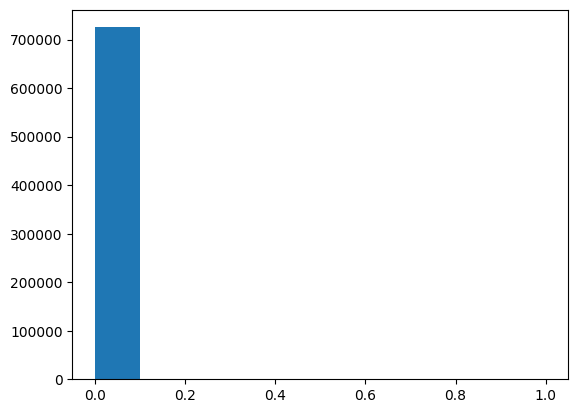

In [ ]:
import matplotlib.pyplot as plt

plt.hist(y_pred.values.flatten())
# plt.show()

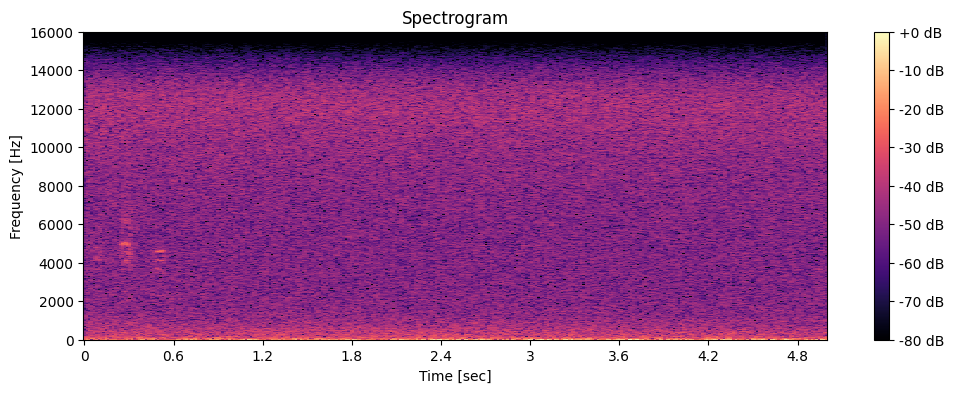

ValueError: not enough values to unpack (expected 3, got 2)

In [27]:
from IPython.display import Audio
import IPython.display
import torchaudio.functional as F
import matplotlib.pyplot as plt

import matplotlib 

def play_audio(audio,sr):
    IPython.display.display(Audio(audio, rate=sr))

import librosa
import librosa.display
import numpy as np

def plot_spectrogram_librosa(audio, sr, min_db=-80, max_db=30, title='Spectrogram', size=(12, 4)):
    """
    Plot a spectrogram of an audio signal with specified decibel limits using librosa.

    Parameters:
    audio (numpy.array): Audio signal array.
    sr (int): Sampling rate of the audio signal.
    min_db (int): Minimum decibel value for the spectrogram.
    max_db (int): Maximum decibel value for the spectrogram.
    title (str): Title of the plot.
    size (tuple): Size of the plot.
    """
    # Calculate the magnitude spectrogram
    S = np.abs(librosa.stft(audio))

    # Convert to decibels
    S_db = librosa.amplitude_to_db(S, ref=np.max)

    # Clip to the specified decibel range
    S_db_clipped = np.clip(S_db, min_db, max_db)

    # Plot
    plt.figure(figsize=size)
    librosa.display.specshow(S_db_clipped, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')
    plt.show()

# This function uses librosa to calculate and plot a spectrogram with specified decibel limits.
# It requires

# x_hp = F.highpass_biquad(x, cfg.sample_rate, cutoff_freq=500, Q = 0.707)
x_hp = x
x_hp = x_hp[0]
play_audio(x_hp.squeeze(), cfg.sample_rate)
plot_spectrogram_librosa(x_hp.squeeze().cpu().detach().numpy(), cfg.sample_rate)
x_hp = x_hp.unsqueeze(0)
emb = embed(x_hp.to(cfg.device))
if isinstance(emb, tuple):
    f = emb[1]
    emb = emb[0]
logit = emb_cl(emb.to('cpu'))
pred = torch.sigmoid(logit)
pred = pred.detach().cpu().numpy()
preds_restr = pred[0, feasible_set]
print(scored_birds[preds_restr.argmax()], y, preds_restr.max())

separated = separator(x_hp.to(cfg.device))

for i in range(4):
    play_audio(separated[0,i].squeeze().cpu().detach().numpy(), cfg.sample_rate)
    plot_spectrogram_librosa(separated[0,i].squeeze().cpu().detach().numpy(), cfg.sample_rate)

    # predict
    emb = embed(separated[:,i].unsqueeze(0))
    if isinstance(emb, tuple):
        f = emb[1]
        emb = emb[0]
    logit = emb_cl(emb.to('cpu'))
    pred = torch.sigmoid(logit)
    pred = pred.detach().cpu().numpy()
    preds_restr = pred[0, feasible_set]
    print(scored_birds[preds_restr.argmax()], y, preds_restr.max())
    # print(coder.decode(pred.argmax()), y, pred.max())              c       0.0                                    


In [ ]:
# for species in species_codes:
for species in scored_birds:
    idx_class = coder.encode(species)
    print(pred[0,idx_class].item(), species)

In [ ]:
with torch.no_grad():

    separated = separator(x_hp.unsqueeze(1).to(cfg.device))

In [ ]:
with torch.no_grad():

    emb_mix = embed(x_hp.to(cfg.device).unsqueeze(1))
    if isinstance(emb_mix, tuple):
        f = emb_mix[1]
        emb_mix = emb_mix[0]

    embs_sep = []
    for i in range(4):
        emb = embed(separated[:,i].unsqueeze(1))
        if isinstance(emb, tuple):
            f = emb[1]
            emb = emb[0]
        embs_sep.append(emb)

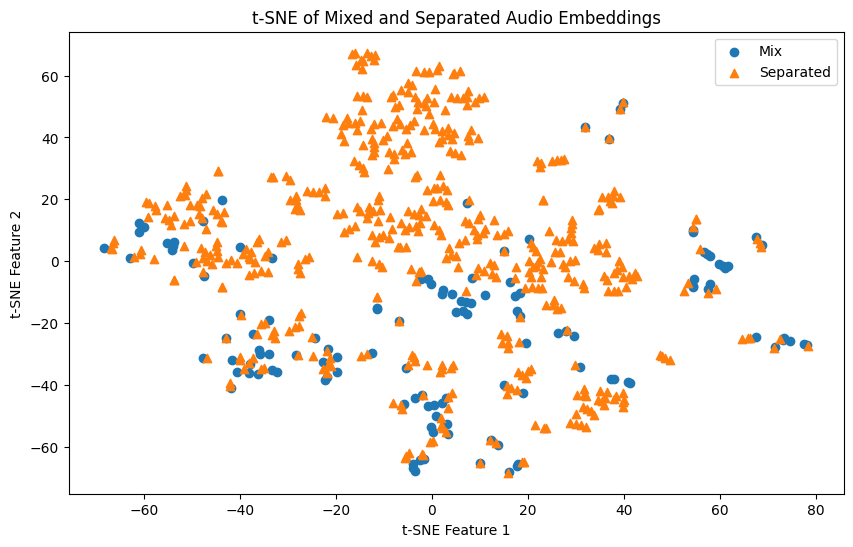

In [ ]:
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming emb_mix and embs_sep are already defined as per your code

# Step 1: Prepare the Data
# Flatten the list of separated embeddings and create labels
all_embeddings = [emb_mix] + embs_sep
all_embeddings = torch.cat(all_embeddings, dim=0)
labels = ['Mix'] * emb_mix.size(0) + ['Separated'] * len(embs_sep) * emb_mix.size(0)

# Step 2: Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=1200)
embeddings_2d = tsne.fit_transform(all_embeddings.cpu().detach().numpy())

# Step 3: Plotting
plt.figure(figsize=(10, 6))
for label, marker in zip(['Mix', 'Separated'], ['o', '^']):
    indices = [i for i, l in enumerate(labels) if l == label]
    plt.scatter(embeddings_2d[indices, 0], embeddings_2d[indices, 1], marker=marker, label=label)

plt.title("t-SNE of Mixed and Separated Audio Embeddings")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.legend()
plt.show()


In [ ]:

emb_mix[0]

tensor([ 0.4991, -0.5627,  1.6447,  ...,  1.3715, -1.1463,  1.5410],
       device='cuda:0')

In [ ]:
play_audio(x_hp[0].cpu().numpy(), cfg.sample_rate)
for i in range(4):
    print(embs_sep[i][0])
    print(torch.cosine_similarity(emb_mix[0], embs_sep[i][0], dim=0))
    play_audio(separated[i].cpu().numpy(), cfg.sample_rate)


tensor([-0.2060, -0.1188,  0.3479,  ...,  0.8456, -0.4962,  0.4629],
       device='cuda:0')
tensor(0.5700, device='cuda:0')


tensor([-0.1404,  0.1340, -0.0166,  ...,  1.0441, -0.3461,  0.6049],
       device='cuda:0')
tensor(0.2486, device='cuda:0')


tensor([ 0.5941,  0.2131,  0.5662,  ...,  0.7203, -0.5736,  0.0816],
       device='cuda:0')
tensor(0.6521, device='cuda:0')


tensor([ 0.0836,  0.1294, -0.0649,  ..., -0.0421, -0.0514,  0.4610],
       device='cuda:0')
tensor(0.1629, device='cuda:0')


In [ ]:
x.shape

torch.Size([128, 160000])

In [28]:
from dataset import audio_norm, TestDataset
from tqdm import tqdm

cfg.device = 'cuda'
cfg.frame_size_s = 5
data_folder = r'test_data_hawaii/soundscape_data'

transform = lambda x: x

embeddings = []
separator.eval()
emb_cl.eval()

separator.to(cfg.device)
emb_cl.to(cfg.device)
embed.to(cfg.device)

test_dataset = TestDataset(data_folder = data_folder, annotations=transformed_df, test_size = 'all', 
                           transform=transform, species=species_df_scored, cfg=cfg, center_frame = False)

test_dataset._sample()

true_data_df = test_dataset.submission_f
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False,
                                           num_workers=32, 
                                          pin_memory=False,
                                           prefetch_factor=2,
                                           )


print(len(test_dataset), len(test_loader))
predictions = []
labels = []
labels_pred = []
for i, (a, x, y, name) in enumerate(tqdm(test_loader)):
    # x = audio_norm(x)
    with torch.no_grad():
        x_hp = F.highpass_biquad(x.to(cfg.device), cfg.sample_rate, cutoff_freq=500, Q = 0.707)
        # x_hp = x.to(cfg.device)
        # break
        separated = separator(x_hp.unsqueeze(1))
        separated = torch.cat((x_hp.unsqueeze(1), separated), dim=1)
        # separated = torch.sta
        # for i in range(4):
        #     x = separated[:,i]
        #     # x = x.unsqueeze(1)
        #     x = x.float().to(cfg.device)
        #     # break
        # x = separated.squeeze().unsqueeze(1)

        # x = separated.squeeze()
        # emb = embed(x)

        # if isinstance(emb, tuple):
        #     f = emb[1]
        #     emb = emb[0]
        # logit= emb_cl(emb)

        # logit, _ = emb_cl(emb)
        logits = []
        for i in range(separated.shape[1]):
            x = separated[:,i]
            x = x.float().to(cfg.device).unsqueeze(1)
            emb = embed(x)
            if isinstance(emb, tuple):
                f = emb[1]
                emb = emb[0]
            logit = emb_cl(emb)
            logits.append(logit)

            # break
        logit = torch.stack(logits, dim=1)

        # pred = torch.softmax(logit,dim=1)
        pred = torch.sigmoid(logit)
        pred = torch.max(pred, dim=1).values
        # pred = torch.mean(pred, dim=1)
        pred = pred.cpu().numpy()
        # break
        for idx, p in enumerate(pred): 
            output = [name[idx]]  
            # for species in species_codes:
            for species in scored_birds:
                idx_class = coder.encode(species)
                # if idx_class != len(coder):
                output.append(p[idx_class].item())
                # else:
                    # output.append(0)
            predictions.append(output)
            labels.append(y[idx])
            labels_pred.append(coder.decode(p.argmax()))
        embeddings.append(emb.cpu().detach().numpy())
        # break

34601 271


100%|██████████| 271/271 [06:53<00:00,  1.53s/it]


In [ ]:
separated = torch.cat((x_hp.unsqueeze(1), separated), dim=1)

In [ ]:
torch.vstack([separated[:,i] for i in range(separated.shape[1])]).shape

In [ ]:
separated[:,1].shape

In [29]:
predictions0 = predictions.copy()


In [30]:
max(predictions0[10][1:])

0.729398250579834

In [31]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

predictions = predictions0.copy()
threshold = 0.9
pred_non = []
true_non = []
for i, d in enumerate(predictions):
    out = np.array(d[1:])
    # p_class = out
    p_class = np.zeros_like(out, dtype=int)
    # p_class[out > threshold] = 1.0
    p_class[out == out.max()] = 1
    predictions[i] = [d[0]] + p_class.tolist()
    pred_non.append(out)
    true_non.append(true_data_df.iloc[i].values[1:].astype(int))

# pred_data_df = pd.DataFrame(predictions, columns=['row_id'] + species_codes)
pred_data_df = pd.DataFrame(predictions, columns=['row_id'] + scored_birds)
pred_data_non_df = pd.DataFrame(predictions0, columns=['row_id'] + scored_birds)

y_pred = pred_data_df.drop(['row_id'], axis=1)
y_true = true_data_df.drop(['row_id'], axis=1)
# score = sklearn.metrics.precision_score(y_true, y_pred, average='micro')
# print(score)

score = sklearn.metrics.average_precision_score(
    y_true,
    pred_non,
    average='samples',
)
print(score)
# cmap = class_averaged_mean_average_precision(y_true.values, y_pred.values)
# print("Class-averaged Mean Average Precision:", cmap)

print(padded_cmap(true_data_df,pred_data_non_df, padding_factor=5))
# print(get_accuracy(pred_data_df, true_data_df))
print(sklearn.metrics.accuracy_score(y_true, y_pred))
print(sklearn.metrics.precision_score(y_true, y_pred, average='macro'))
# print(get_f1(pred_data_df, true_data_df))
print(sklearn.metrics.roc_auc_score(true_non, pred_non, average='micro', multi_class='ovr'))

print(sklearn.metrics.label_ranking_average_precision_score(y_true, pred_non))

pred_data_df.head()

0.27310441447526823
0.4124711119633416
0.09788734429640762
0.18152966375779464
0.6955470464104412
0.5264496935134807


row_id  akiapo  aniani  apapan  barpet  crehon  \
0    UHH_001_S01_20161121_150000_0_5       0       0       0       0       0   
1   UHH_001_S01_20161121_150000_5_10       0       1       0       0       0   
2  UHH_001_S01_20161121_150000_10_15       0       0       0       0       0   
3  UHH_001_S01_20161121_150000_15_20       0       0       0       0       0   
4  UHH_001_S01_20161121_150000_20_25       0       0       0       0       0   

   elepai  ercfra  hawama  hawcre  ...  hawpet1  houfin  iiwi  jabwar  maupar  \
0       0       0       0       0  ...        0       0     0       0       0   
1       0       0       0       0  ...        0       0     0       0       0   
2       0       0       0       0  ...        0       0     0       1       0   
3       0       0       1       0  ...        0       0     0       0       0   
4       0       0       0       0  ...        0       0     1       0       0   

   omao  puaioh  skylar  warwhe1  yefcan  
0     0       0       0        0       1  
1     0       0       0        0       0  
2     0       0       0        0       0  
3     0       0       0        0       0  
4     0       0       0        0       0  

[5 rows x 22 columns]

In [136]:
pred_data_non_df.head()

row_id    akiapo    aniani    apapan    barpet  \
0    UHH_001_S01_20161121_150000_0_5  0.000971  0.005133  0.002243  0.002941   
1   UHH_001_S01_20161121_150000_5_10  0.000843  0.039812  0.003198  0.006203   
2  UHH_001_S01_20161121_150000_10_15  0.000456  0.034956  0.005675  0.001693   
3  UHH_001_S01_20161121_150000_15_20  0.000443  0.006308  0.006739  0.004048   
4  UHH_001_S01_20161121_150000_20_25  0.000241  0.010403  0.008712  0.002397   

     crehon    elepai    ercfra    hawama    hawcre  ...   hawpet1    houfin  \
0  0.003809  0.000967  0.001362  0.034253  0.000684  ...  0.002907  0.009105   
1  0.008076  0.001016  0.004389  0.006861  0.005299  ...  0.004990  0.009982   
2  0.008905  0.000931  0.001375  0.132392  0.001129  ...  0.001677  0.015139   
3  0.007759  0.001268  0.001549  0.167437  0.003977  ...  0.011327  0.009778   
4  0.004386  0.000423  0.001460  0.471236  0.001118  ...  0.002395  0.016050   

       iiwi    jabwar    maupar      omao    puaioh    skylar   warwhe1  \
0  0.177551  0.026402  0.002766  0.000676  0.001210  0.007842  0.002196   
1  0.118519  0.022958  0.005377  0.002007  0.001532  0.009337  0.000756   
2  0.120908  0.008697  0.004197  0.000420  0.002556  0.006864  0.004271   
3  0.006615  0.046554  0.006572  0.001214  0.001310  0.005962  0.002605   
4  0.056367  0.009821  0.002087  0.002442  0.000408  0.002858  0.004082   

     yefcan  
0  0.008203  
1  0.001502  
2  0.000703  
3  0.003377  
4  0.001510  

[5 rows x 22 columns]

In [129]:
d[0]

'UHH_635_S02_20220607_055500_295_300'

In [119]:
pred_non[2]

array([0.00045628, 0.03495624, 0.00567456, 0.00169328, 0.00890523,
       0.00093116, 0.00137505, 0.13239244, 0.00112913, 0.02560155,
       0.00270034, 0.00167745, 0.01513854, 0.12090835, 0.00869734,
       0.00419673, 0.00041993, 0.00255644, 0.0068644 , 0.00427122,
       0.00070287])

In [ ]:
y_pred.shape

In [ ]:
true_data_df.head()

In [ ]:
from sklearn.metrics import average_precision_score
import numpy as np

def class_averaged_mean_average_precision(y_true, y_scores):
    """
    Calculate the Class-averaged Mean Average Precision (CMAP).

    Parameters:
    y_true (numpy.array): 2D array of ground truth binary labels (samples x classes).
    y_scores (numpy.array): 2D array of predicted scores (samples x classes).

    Returns:
    float: Class-averaged Mean Average Precision.
    """
    # Number of classes
    n_classes = y_true.shape[1]

    # Calculate average precision for each class
    ap_per_class = []
    for i in range(n_classes):
        # Compute average precision for the i-th class
        ap = average_precision_score(y_true[:, i], y_scores[:, i])
        ap_per_class.append(ap)

    # Mean Average Precision across all classes
    cmap = np.mean(ap_per_class)

    return cmap

# Example usage
# y_true = np.array(...)  # True binary labels
# y_scores = np.array(...)  # Predicted scores


In [ ]:
separated[0,i].unsqueeze(0).shape

In [ ]:
# # tsne visualization
# from sklearn.manifold import TSNE
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# embeddings = np.array(embeddings).squeeze()

# tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=5000)
# tsne_results = tsne.fit_transform(embeddings)

# tsne_df = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
# tsne_df['label'] = labels
# tsne_df['label'] = tsne_df['label'].astype(str)

# # tsne_df['label'] = coder.spec_to_family(labels)
# # tsne_df['label'] = tsne_df['label'].astype(str)

# plt.figure(figsize=(16,10))
# sns.scatterplot(
#     x="tsne1", y="tsne2",
#     hue="label",
#     palette=sns.color_palette("tab10", len(set( tsne_df['label']))),
#     data=tsne_df,
#     legend="full",
#     alpha=1,
# )



In [ ]:
from dataset import audio_crop, audio_resample
import torchaudio

audio, sr = torchaudio.load(r'birdclef-2021+2023/train_audio_2022/buffle/XC203984.ogg')

audio = audio_norm(audio)
audio = audio_resample(audio, sr, cfg.sample_rate).squeeze()
audio = audio_crop(audio, cfg.sample_rate*5, cfg.sample_rate, type = 'loudest',frac=3)
audio = audio.squeeze().numpy()
play_audio(audio, cfg.sample_rate)

audio = torch.Tensor(audio)

emded = embed(audio.unsqueeze(0).unsqueeze(0))
logit, _ = emb_cl(emded)
pred = torch.sigmoid(logit)
pred = pred.detach().cpu().numpy()

plot_spectrogram_librosa(audio.detach().cpu().numpy(), cfg.sample_rate)

print(pred.max(), coder.decode(pred.argmax()))

# separation
# x_hp = F.highpass_biquad(audio, cfg.sample_rate, cutoff_freq=500, Q = 0.707)
x_hp = audio
separated = separator(x_hp.unsqueeze(0).unsqueeze(0))

for i in range(4):
    play_audio(separated[0,i].squeeze().cpu().detach().numpy(), cfg.sample_rate)
    plot_spectrogram_librosa(separated[0,i].squeeze().cpu().detach().numpy(), cfg.sample_rate)

    # predict
    emb = embed(separated[:,i].unsqueeze(0))
    logit, _ = emb_cl(emb)
    pred = torch.sigmoid(logit)
    pred = pred.detach().cpu().numpy()
    print(coder.decode(pred.argmax()), pred.max())


In [ ]:
audio.shape